# Nick Chen

## Research question/interests

We intend to investigate the demand of global fish and seafood production via wild capturing and the affect it had on climate change by looking at how it affects the sustainable fish stocks. Does the wild fish stock will ever fulfilled the increasing demand resulted by the evergrowing global population? What will be the prediction of the wild fish stock if overfishing still exists for the next decade?

We also want to shift our perspective by looking at how technologies like aquaculture and seafood farming will help alleviate the impact of overfishing. Comparing country and region in terms of the extent of overfishing and their levels of overexploited fisheries to analyze and their production trend.

In [ ]:
## Importing the dataset

import numpy as np
import pandas as pd

aquaculture = pd.read_csv("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/capture-fisheries-vs-aquaculture.csv", sep=",")
capturedVsAquaculture= pd.read_csv("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/capture-fisheries-vs-aquaculture.csv", sep=",")
captured = pd.read_csv("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/capture-fishery-production.csv", sep=",")
seafoodConsumptionpercapita = pd.read_csv("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/fish-and-seafood-consumption-per-capita.csv", sep=",")
sustainableFishStocks = pd.read_csv("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/fish-stocks-within-sustainable-levels.csv", sep=",")
globalFisheryBySector = pd.read_csv("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/global-fishery-catch-by-sector.csv", sep=",")
seafoodProduction = pd.read_csv("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/seafood-and-fish-production-thousand-tonnes.csv", sep=",")

captured.head()


,Entity,Code,Year,Capture fisheries production (metric tons)
0,Afghanistan,AFG,1960,200.0
1,Afghanistan,AFG,1961,300.0
2,Afghanistan,AFG,1962,300.0
3,Afghanistan,AFG,1963,300.0
4,Afghanistan,AFG,1964,300.0


## Exploratory Data Analysis



In [ ]:
##Importing the EDA Code template## 

## Credit: https://gist.github.com/jiahao87/c97214065f996b76ab8fe4ca1964b2b5##

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

        
def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()

                    
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()


def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if df.isnull().any(axis=None):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data
    categorical_eda(df)
    
    # EDA of numeric data
    numeric_eda(df)
        
    # Plot time series plot of numeric data
    time_series_plot(df)

### Preliminary Data Processing


In [ ]:
# Defining 'sustainableFishStocks' as the dataframe for my EDA   
df = pd.read_csv("https://raw.githubusercontent.com/ubco-W2022T1-cosc301/project-group34/main/data/raw/fish-stocks-within-sustainable-levels.csv", sep=",")

# .shape returns the number of rows and columns in the dateframe
df.shape  # total 51 rows and 5 columns

In [ ]:
# .head() returns the first 5 rows of the dataframe
df.head()

,Entity,Code,Year,"Share of fish stocks within biologically sustainable levels (FAO, 2020)",Share of fish stocks that are overexploited
0,Eastern Central Atlantic,NaN,2015,57.142860,42.857140
1,Eastern Central Atlantic,NaN,2017,57.142857,42.857143
2,Eastern Central Pacific,NaN,2015,86.666670,13.333330
3,Eastern Central Pacific,NaN,2017,86.666667,13.333333
4,Eastern Indian Ocean,NaN,2015,73.076920,26.923080


In [ ]:
# .columns returns the names of columns involved in the dataframe
df.columns

Index(['Entity', 'Code', 'Year',
       'Share of fish stocks within biologically sustainable levels (FAO, 2020)',
       'Share of fish stocks that are overexploited'],
      dtype='object')

In [ ]:
# returns the number of unique values for each variable.
df.nunique(axis=0)

Entity                                                                     16
Code                                                                        1
Year                                                                       21
Share of fish stocks within biologically sustainable levels (FAO, 2020)    51
Share of fish stocks that are overexploited                                51
dtype: int64

In [ ]:
# summarizes the count, mean, standard deviation, min, and max for numeric variables.
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Year,"Share of fish stocks within biologically sustainable levels (FAO, 2020)",Share of fish stocks that are overexploited
count,51.000000,51.000000,51.000000
mean,2007.705882,70.521579,29.478421
std,13.150352,13.885635,13.885635
min,1974.000000,37.500000,8.536585
25%,2002.000000,66.257862,18.156843
50%,2015.000000,73.076920,26.923080
75%,2017.000000,81.843157,33.742138
max,2017.000000,91.463415,62.500000


In [ ]:
# return unique discrete variables in the dataset (Regions in this case)
df.Entity.unique()                 

array(['Eastern Central Atlantic', 'Eastern Central Pacific',
       'Eastern Indian Ocean', 'Mediterranean and Black Sea',
       'Northeast Central Atlantic', 'Northeast Pacific',
       'Northwest Central Atlantic', 'Northwest Pacific',
       'Southeast Central Atlantic', 'Southeast Pacific',
       'Southwest Atlantic', 'Southwest Pacific',
       'Western Central Atlantic', 'Western Central Pacific',
       'Western Indian Ocean', 'World'], dtype=object)

### The Exploratory Data Analysis

Preview of data:


,Entity,Code,Year,"Share of fish stocks within biologically sustainable levels (FAO, 2020)",Share of fish stocks that are overexploited
0,Eastern Central Atlantic,NaN,2015,57.142860,42.857140
1,Eastern Central Atlantic,NaN,2017,57.142857,42.857143
2,Eastern Central Pacific,NaN,2015,86.666670,13.333330



To check: 
 (1) Total number of entries 
 (2) Column types 
 (3) Any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Entity                                                                   51 non-null     object 
 1   Code                                                                     21 non-null     object 
 2   Year                                                                     51 non-null     int64  
 3   Share of fish stocks within biologically sustainable levels (FAO, 2020)  51 non-null     float64
 4   Share of fish stocks that are overexploited                              51 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 2.1+ KB
None

Preview of data with null values:

,Entity,Code,Year,"Share of fish stocks within biologically sustainable levels (FAO, 2020)",Share of fish stocks that are overexploited
0,Eastern Central Atlantic,NaN,2015,57.142860,42.857140
1,Eastern Central Atlantic,NaN,2017,57.142857,42.857143
2,Eastern Central Pacific,NaN,2015,86.666670,13.333330


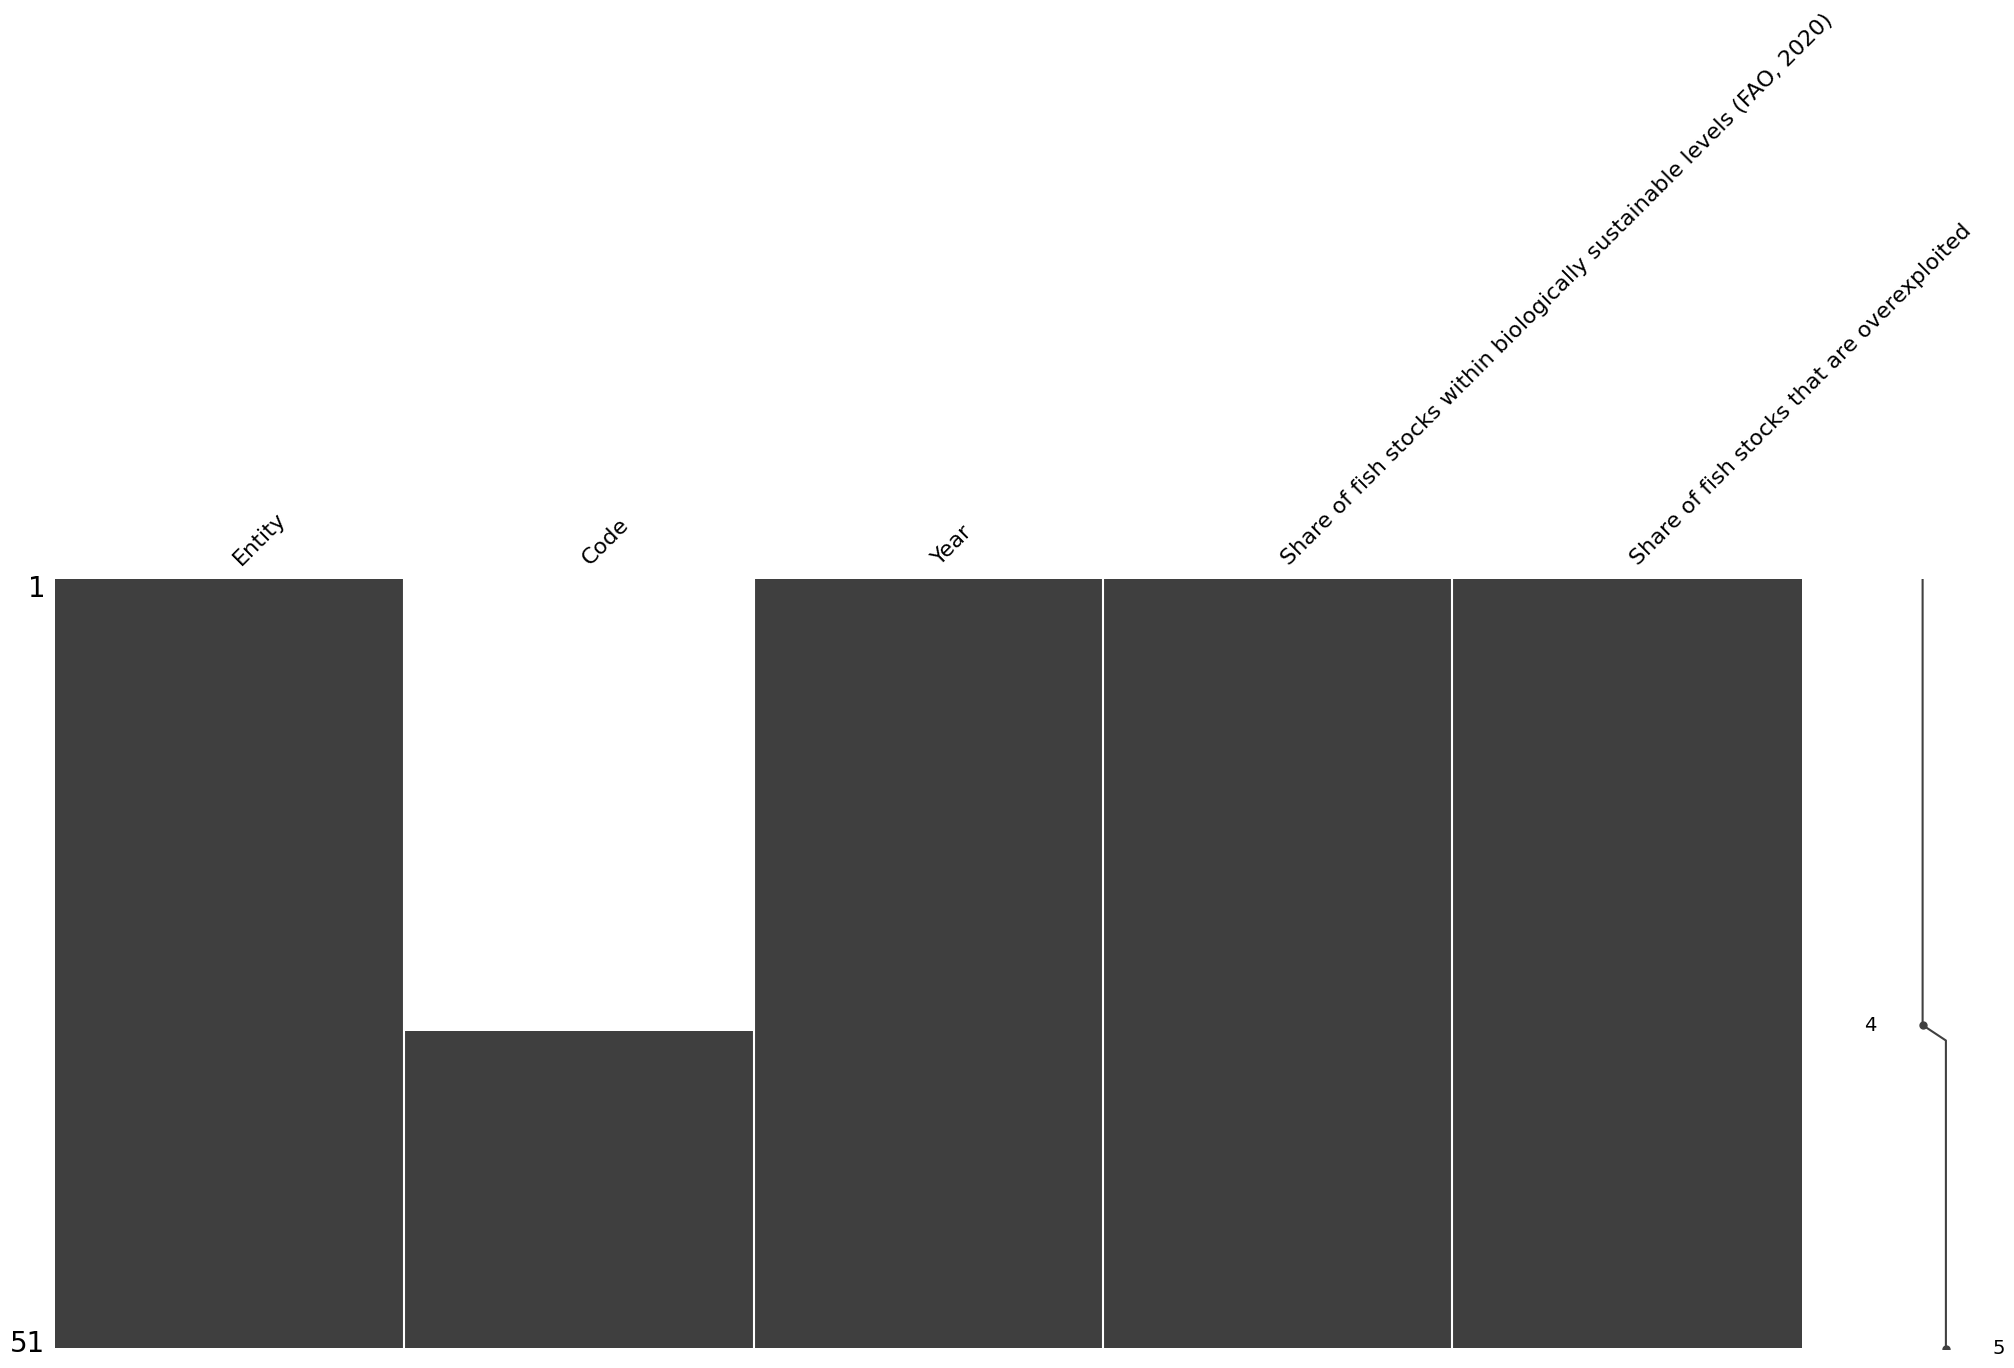


No duplicated entries found

To check: 
Unique count of non-numeric data

Entity    16
Code       1
dtype: int64
Top 5 unique values of Entity
                        Entity  Count
0                        World     21
1     Eastern Central Atlantic      2
2      Eastern Central Pacific      2
3         Eastern Indian Ocean      2
4  Mediterranean and Black Sea      2
 
Top 5 unique values of Code
       Code  Count
0  OWID_WRL     21
 

To check: 
Distribution of numeric data


,count,mean,std,min,25%,50%,75%,max
Year,51.0,2007.705882,13.150352,1974.000000,2002.000000,2015.00000,2017.000000,2017.000000
"Share of fish stocks within biologically sustainable levels (FAO, 2020)",51.0,70.521579,13.885635,37.500000,66.257862,73.07692,81.843157,91.463415
Share of fish stocks that are overexploited,51.0,29.478421,13.885635,8.536585,18.156843,26.92308,33.742138,62.500000


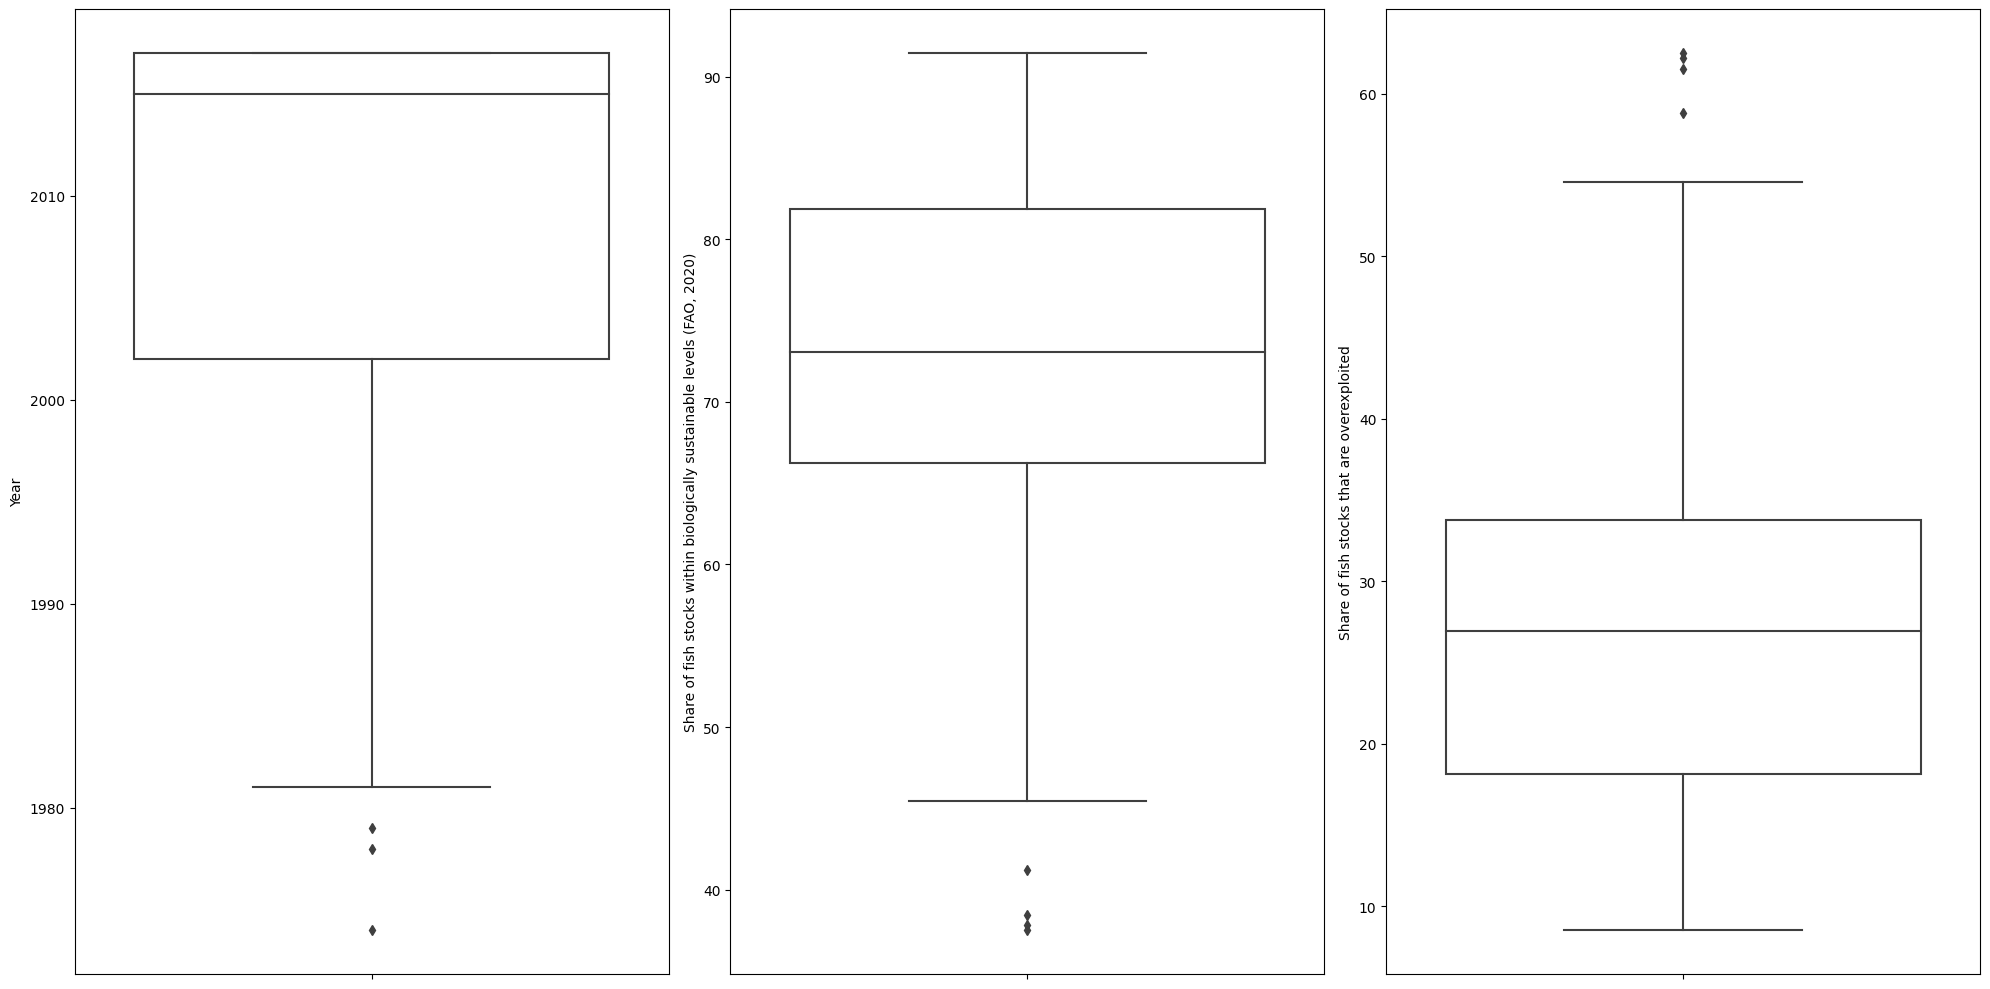


To check pairwise joint distribution of numeric data


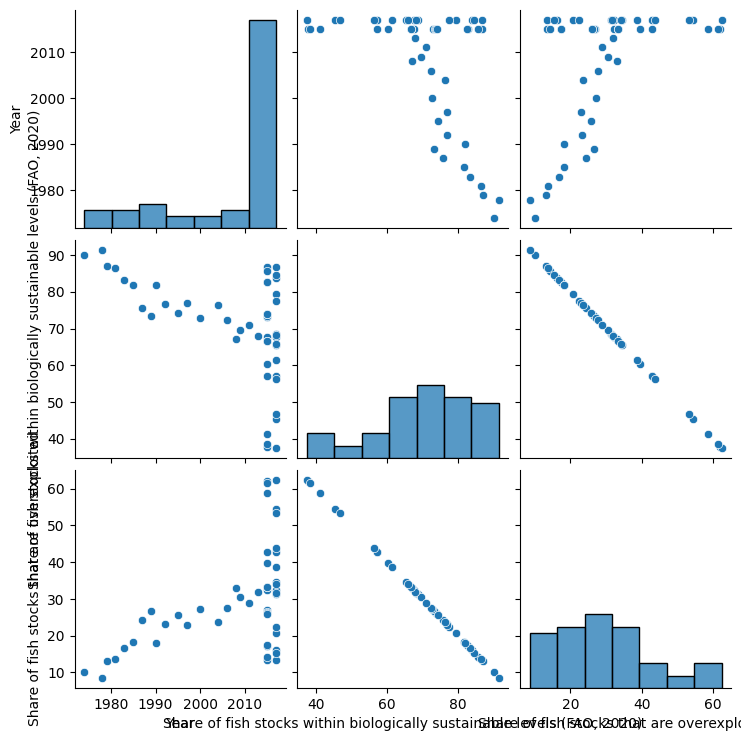


To check time series of numeric data  by daily, monthly and yearly frequency


In [ ]:
eda(df)

Note there is no duplicated value in our dataframe, where the code output directly prints "no duplicate entries found" 


Preview of data with null values:
xxxxxxxxxxxxx
                     Entity Code  Year  \
0  Eastern Central Atlantic  NaN  2015   
1  Eastern Central Atlantic  NaN  2017   
2   Eastern Central Pacific  NaN  2015   

   Share of fish stocks within biologically sustainable levels (FAO, 2020)  \
0                                          57.142860                         
1                                          57.142857                         
2                                          86.666670                         

   Share of fish stocks that are overexploited  
0                                    42.857140  
1                                    42.857143  
2                                    13.333330  


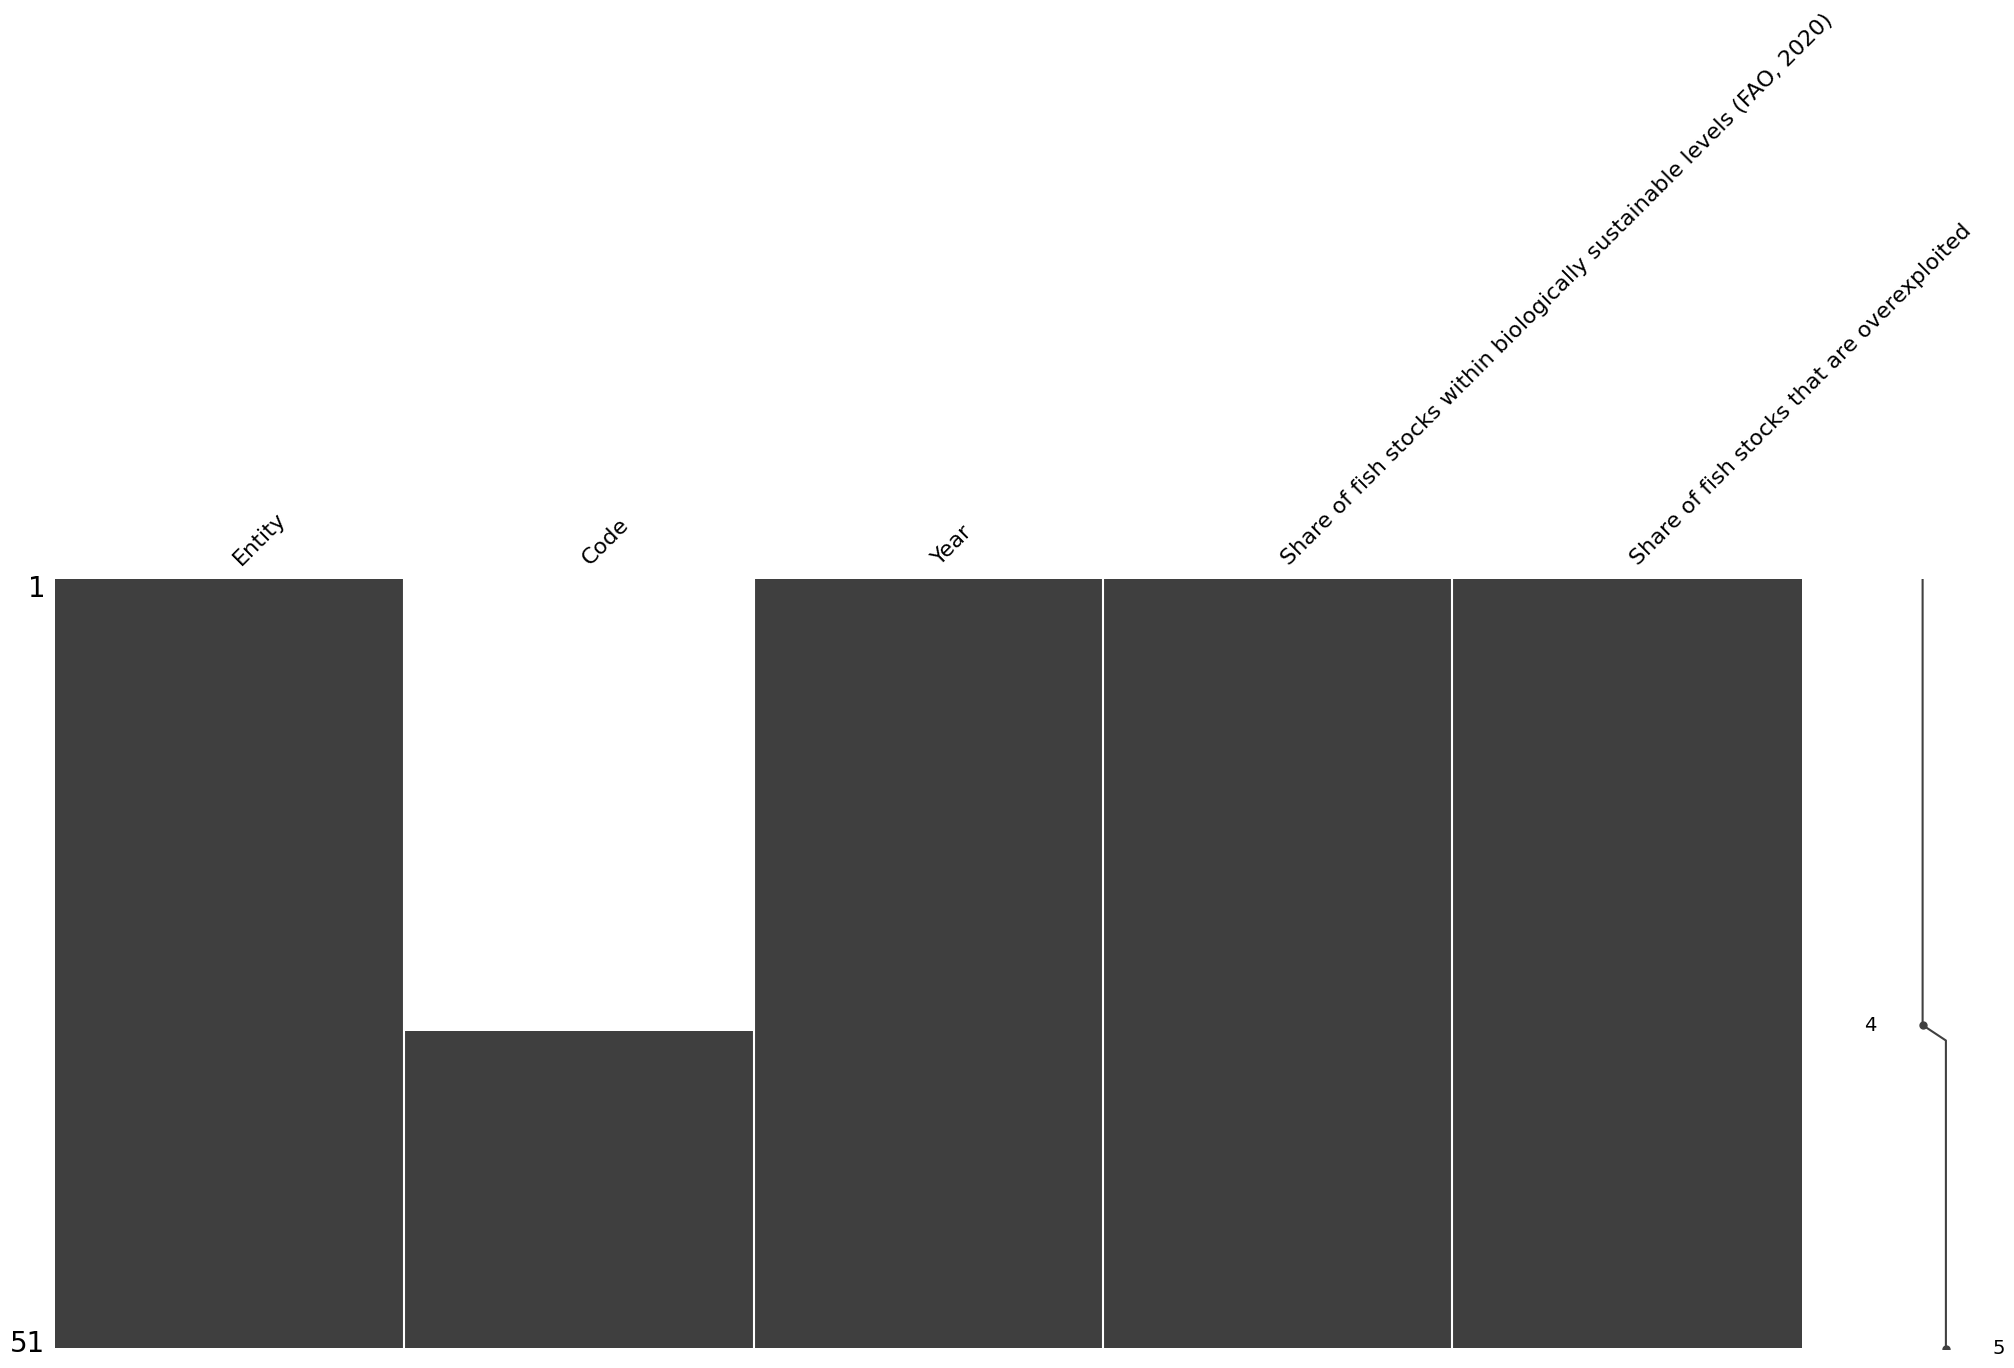

In [ ]:
# generate preview of entries with null values
if df.isnull().any(axis=None):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(df[df.isnull().any(axis=1)].head(3))
    missingno.matrix(df)
    plt.show()